# 1. Import Packages and Library

In [58]:
#! pip install tensorflow == 2.8.2
#! pip install keras == 2.8.0
import tensorflow as tf 
from tensorflow import keras
from keras.layers import Embedding
import keras.backend as K
from keras.models import load_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost

from sklearn.feature_extraction.text import CountVectorizer

from transformers import BertTokenizer, TFBertModel

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score

import scipy
import pandas as pd
import numpy as np
import gensim

import nltk
from nltk.data import find
import matplotlib.pyplot as plt
#import shap

import seaborn as sns
import matplotlib
import sklearn
import pickle
import random
import multiprocessing
import os
import sys
import re
import gc
import pickle as pkl



#! pip install ann_visualizer
from ann_visualizer.visualize import ann_viz
from keras.utils.vis_utils import plot_model

#! pip install wordcloud
from wordcloud import wordcloud
%matplotlib inline

In [40]:
#!pip install -U scikit-learn
#!pip uninstall scikit-learn
#!pip install scikit-learn==0.24.2
print(sklearn.__version__)


0.23.2


NameError: name 'scikit' is not defined

In [26]:
!ls -l
#print(tf.__version__)
#print(keras.__version__)

total 1696640
drwxr-xr-x   7 trespimentel  staff        224 Jul 29 15:36 GTZAN_Genre_Classification_Alternative
-rw-r--r--   1 trespimentel  staff     146471 Jul 29 15:36 General_EDA_Train_Test_Set_Creation.ipynb
drwxr-xr-x   4 trespimentel  staff        128 Jul 29 15:36 General_Pipelines_And_Model_Architectures
drwxr-xr-x   8 trespimentel  staff        256 Jul 29 17:34 Genre_Classification
drwxr-xr-x  14 trespimentel  staff        448 Jul 29 15:46 Language_Detection
-rw-r--r--   1 trespimentel  staff      74262 Jul 29 15:36 NLP with DL Helper Notebook.ipynb
drwxr-xr-x   5 trespimentel  staff        160 Jul 29 15:36 Original_Data
-rw-r--r--   1 trespimentel  staff       3724 Jul 29 15:36 README.md
drwxr-xr-x   6 trespimentel  staff        192 Jul 29 15:36 Relevent_Notebooks
-rw-r--r--   1 trespimentel  staff     685195 Jul 30 09:03 Tools for Analyzing Neural Networks and Model Performance, Analyzing Datasets.ipynb
drwxr-xr-x   8 trespimentel  staff        256 Jul 29 15:36 Topic_Density

# 2. Custom Metric Functions to Evaluate Model Performance

#### Class Recall

In [21]:
def class_recall(y_true,y_pred):
    #true labels
    true = y_true.numpy()
    #predicted prob of each class for each sample
    pred = y_pred.numpy()
    #prob to class based off max predicted prob
    pred = np.array([x.argmax() for x in pred])
    #confusion matrix
    confuse = confusion_matrix(true,pred)
    confuse_sum = confuse.sum(axis=1)
    score = 0
    for num in range(len(confuse_sum)):
        if confuse_sum[num]!=0:
            score = score + confuse[num][num]/confuse_sum[num]
    
    return score/len(confuse_sum)

#### Avg Deviation

In [22]:
def density_avg_deviation(y_true,y_pred):
    #true density
    true = y_true.numpy()
    true = true/np.sum(true,axis=1).reshape((true.shape[0],1))
    #predicted density of each topic for each example
    pred = y_pred.numpy()
    pred = pred/np.sum(pred,axis=1).reshape((pred.shape[0],1))
    #absolute deviation between true and pred for each topic for each example
    deviation = abs(true-pred)
    #Avg Deviation
    avg_deviation = deviation.sum()/(deviation.shape[0]*deviation.shape[1])
    
    return avg_deviation

# 3. Visualizing Model Architectures

In [27]:
sample_model = tf.keras.models.load_model('good_model_test')
#sample_model = load_model('Genre_Classification/good_model_test',custom_objects={'density_avg_deviation':density_avg_deviation})
#sample_model = load_model('Topic_Density_Classification/CNNs/word2vec_cnn_topic_density.h5',custom_objects={'density_avg_deviation':density_avg_deviation})

In [ ]:
pred = np.array([x.argmax() for x in predictions_final_model])
    #confusion matrix
confuse = confusion_matrix(test_labels.map(mapping),predictions_final_model)
confuse_sum = confuse.sum(axis=1)
score = 0
for num in range(len(confuse_sum)):
    if confuse_sum[num]!=0:
        score = score + confuse[num][num]/confuse_sum[num]
    
return score/len(confuse_sum)

In [32]:
plot_model(sample_model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 4. Plot Performance of Model on Validation/Test Set

### Classification Performance Given Confusion Matrix

In [41]:
confusion_matrix = pickle.load(open('Genre_Classification/final_model_confusion.pkl','rb'))
display(confusion_matrix)
overall_acc = (np.array(confusion_matrix).diagonal().sum())/(confusion_matrix.sum().sum())
display(overall_acc)

,Indie,Metal,Pop,Rock,Alternative,Hip Hop,Blues
Indie,112,2,20,22,62,3,2
Metal,2,120,1,11,1,1,1
Pop,18,2,142,12,11,14,0
Rock,26,38,24,240,52,7,15
Alternative,29,2,14,23,65,1,3
Hip Hop,2,0,5,5,0,111,1
Blues,2,1,1,12,1,2,55


0.6520061728395061

#### Class Recall

In [42]:
class_recall_matrix = confusion_matrix/np.array(confusion_matrix.sum(axis=1).repeat(confusion_matrix.shape[1])).reshape(confusion_matrix.shape)
class_recall_matrix = round(class_recall_matrix,3)

In [43]:
display(class_recall_matrix)
recall_by_class = pd.DataFrame(np.array(class_recall_matrix).diagonal(),index = class_recall_matrix.index,columns=['Recall'])
display(recall_by_class)

,Indie,Metal,Pop,Rock,Alternative,Hip Hop,Blues
Indie,0.502,0.009,0.090,0.099,0.278,0.013,0.009
Metal,0.015,0.876,0.007,0.080,0.007,0.007,0.007
Pop,0.090,0.010,0.714,0.060,0.055,0.070,0.000
Rock,0.065,0.095,0.060,0.597,0.129,0.017,0.037
Alternative,0.212,0.015,0.102,0.168,0.474,0.007,0.022
Hip Hop,0.016,0.000,0.040,0.040,0.000,0.895,0.008
Blues,0.027,0.014,0.014,0.162,0.014,0.027,0.743


,Recall
Indie,0.502
Metal,0.876
Pop,0.714
Rock,0.597
Alternative,0.474
Hip Hop,0.895
Blues,0.743


#### Class Precision

In [44]:
class_precision_matrix = confusion_matrix/(np.array(confusion_matrix.sum(axis=0).repeat(confusion_matrix.shape[0])).reshape(confusion_matrix.shape).T)
class_precision_matrix = round(class_precision_matrix,3)

In [45]:
display(class_precision_matrix)
precision_by_class = pd.DataFrame(np.array(class_precision_matrix).diagonal(),index = class_precision_matrix.index,columns=['Precision'])
display(precision_by_class)

,Indie,Metal,Pop,Rock,Alternative,Hip Hop,Blues
Indie,0.586,0.012,0.097,0.068,0.323,0.022,0.026
Metal,0.010,0.727,0.005,0.034,0.005,0.007,0.013
Pop,0.094,0.012,0.686,0.037,0.057,0.101,0.000
Rock,0.136,0.230,0.116,0.738,0.271,0.050,0.195
Alternative,0.152,0.012,0.068,0.071,0.339,0.007,0.039
Hip Hop,0.010,0.000,0.024,0.015,0.000,0.799,0.013
Blues,0.010,0.006,0.005,0.037,0.005,0.014,0.714


,Precision
Indie,0.586
Metal,0.727
Pop,0.686
Rock,0.738
Alternative,0.339
Hip Hop,0.799
Blues,0.714


#### Class F1

In [46]:
f1_by_class = pd.DataFrame((2*recall_by_class['Recall']*precision_by_class['Precision'])/
             (recall_by_class['Recall'] + precision_by_class['Precision']),columns = ['F1'])

#### Plot Precision, Recall, F1

In [47]:
full_performance = recall_by_class.copy()
full_performance['Precision'] = precision_by_class['Precision']
full_performance['F1'] = f1_by_class['F1']
full_performance

,Recall,Precision,F1
Indie,0.502,0.586,0.540757
Metal,0.876,0.727,0.794575
Pop,0.714,0.686,0.699720
Rock,0.597,0.738,0.660054
Alternative,0.474,0.339,0.395292
Hip Hop,0.895,0.799,0.844280
Blues,0.743,0.714,0.728211


In [48]:
summary = full_performance.mean(axis=0)

In [49]:
recall_by_class = recall_by_class.append(pd.DataFrame([summary.iloc[0]],index = ['AVERAGE'],columns = ['Recall']))
precision_by_class = precision_by_class.append(pd.DataFrame([summary.iloc[1]],index = ['AVERAGE'],columns = ['Precision']))
f1_by_class = f1_by_class.append(pd.DataFrame([summary.iloc[2]],index = ['AVERAGE'],columns = ['F1']))


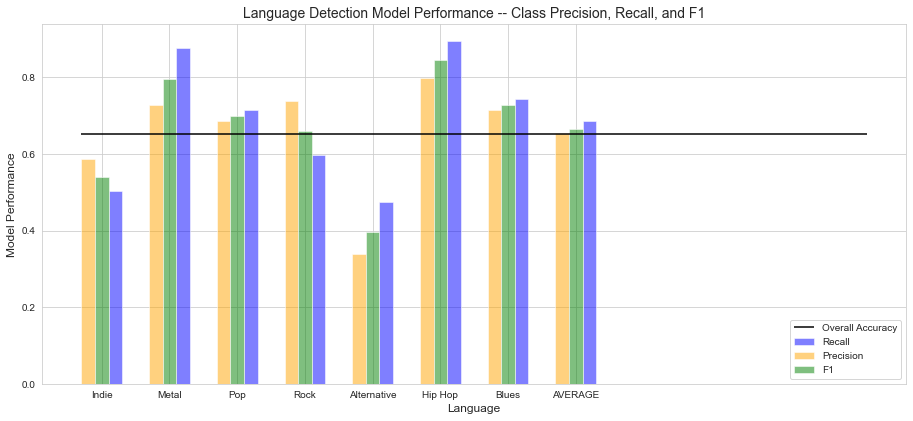

In [50]:
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,5))
axes = fig.add_axes([0,0,1,1])
axes.bar(np.arange(len(recall_by_class)) + 0.2,recall_by_class['Recall'],label = 'Recall',alpha=0.5,width=0.2,color='blue')
axes.bar(np.arange(len(precision_by_class)) - 0.2,precision_by_class['Precision'],label = 'Precision',alpha=0.5,width=0.2,color='orange')
axes.bar(np.arange(len(f1_by_class)),f1_by_class['F1'],label='F1',alpha = 0.5,width=0.2,color='green')
axes.hlines(overall_acc,xmin = -0.3, xmax = 11.3,color = 'black',label = 'Overall Accuracy')
plt.xticks(np.arange(len(f1_by_class)),f1_by_class.index)
axes.set_xlabel('Language',fontsize=12)
axes.set_ylabel('Model Performance',fontsize=12)
axes.set_title('Language Detection Model Performance -- Class Precision, Recall, and F1',fontsize=14)
axes.legend(loc=4)
plt.show()

#### Heatmaps to visualize model performance

<AxesSubplot:>

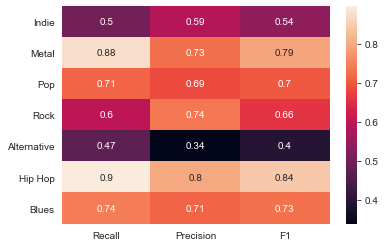

In [51]:
sns.heatmap(full_performance,annot=full_performance)

### Density Estimation Performance - Comparing the Deviation Between Predicted Topic Densities and Actual Topic Densities in Aggregate

#### Generate True, Predicted, and Baseline Predicted Densities (w/ the latter predicting equal density in every case)

In [54]:
true_density = pickle.load(open('Genre_Classification/Train_Test_Data/genre_test_final.pkl','rb'))[[x for x in pickle.load(open('Genre_Classification/Train_Test_Data/genre_train_final.pkl','rb')).columns]]
true_density

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Lyrics,Major Genre
18946,0.607,0.905,-4.748,0.0427,0.001220,0.000276,0.0624,0.5330,141.984,231200,Paper in Fire Lyrics[Verse 1]\nShe had a dream...,Rock
6641,0.401,0.556,-10.532,0.0513,0.082800,0.000359,0.5890,0.6540,85.206,275867,SCP Series LyricsList of SCPs\n\n001 to 099\n\...,Rock
11527,0.751,0.490,-13.679,0.0453,0.009320,0.145000,0.0725,0.9250,105.407,342189,Time (You and I) Lyrics[Chorus]\nThat's life\n...,Alternative
4679,0.522,0.811,-5.343,0.0372,0.026300,0.000000,0.2990,0.4660,92.889,202917,Holy Ghost Fire Lyrics[Verse 1]\nLost myself a...,Rock
17005,0.446,0.997,-2.686,0.1100,0.000017,0.022200,0.3080,0.0416,159.990,168565,Seeing God LyricsChildren of the cloven hoof\n...,Metal
...,...,...,...,...,...,...,...,...,...,...,...,...
15462,0.277,0.993,-5.270,0.1470,0.000670,0.070100,0.0985,0.0736,99.456,304667,Battery Lyrics[Verse 1]\nLashing out the actio...,Metal
3875,0.598,0.466,-11.611,0.2140,0.058400,0.040100,0.4310,0.5720,89.621,155985,Bends Lyrics[Chorus]\nI got the bends from com...,Pop
8229,0.654,0.757,-9.208,0.0919,0.049800,0.918000,0.4930,0.1830,133.951,210896,CHAPTER XIX. THE PERCEPTION OF ‘THINGS.’ Lyric...,Indie
1372,0.448,0.842,-8.658,0.0895,0.050200,0.005190,0.1500,0.3430,156.947,231210,Dream Sleep Eat Lyrics[Verse 1]\nLaying by you...,Rock


In [55]:
np.random.seed(50)
predicted_density = true_density + np.random.random(len(np.array(true_density).flatten())).reshape(true_density.shape)
predicted_density = predicted_density/np.array(predicted_density.sum(axis=1).repeat(11)).reshape(predicted_density.shape)
baseline = pd.DataFrame((1/11)*np.ones(true_density.shape),columns = true_density.columns,index=true_density.index)

TypeError: can only concatenate str (not "float") to str

#### Get Avg Density Deviation Overall, By Topic

In [19]:
def density_avg_deviation_numpy(true,pred,calc_type = 'overall'):
    deviation = abs(true - pred)
    if calc_type == 'overall':
        return deviation.sum().sum()/(deviation.shape[0]*deviation.shape[1])
    elif calc_type == 'topic':
        return deviation.mean(axis=0)

In [20]:
pred_overall_deviation = density_avg_deviation_numpy(true_density,predicted_density)
baseline_overall_deviation = density_avg_deviation_numpy(true_density,baseline)
model_improvement = (baseline_overall_deviation - pred_overall_deviation)/baseline_overall_deviation
print('Avg Density Deviation Between True and Pred: ' + str(pred_overall_deviation))
print('Avg Density Deviation Between True and Baseline: ' + str(baseline_overall_deviation))
print('Model Improvement Over Baseline: ' + str(round(100*model_improvement,2)) + '%')

Avg Density Deviation Between True and Pred: 0.09565225617981185
Avg Density Deviation Between True and Baseline: 0.10875920741569406
Model Improvement Over Baseline: 12.05%


#### Plot Avg Density Deviation by Topic

In [21]:
pred_topic_deviation = density_avg_deviation_numpy(true_density,predicted_density,'topic')
pred_topic_deviation = pred_topic_deviation.append(pd.Series([pred_overall_deviation],index = ['AVERAGE']))
baseline_topic_deviation = density_avg_deviation_numpy(true_density,baseline,'topic')
baseline_topic_deviation = baseline_topic_deviation.append(pd.Series([baseline_overall_deviation],index = ['AVERAGE']))
improvement_over_baseline = [round(100*(x-y)/x,2) for x,y in zip(baseline_topic_deviation,pred_topic_deviation)]

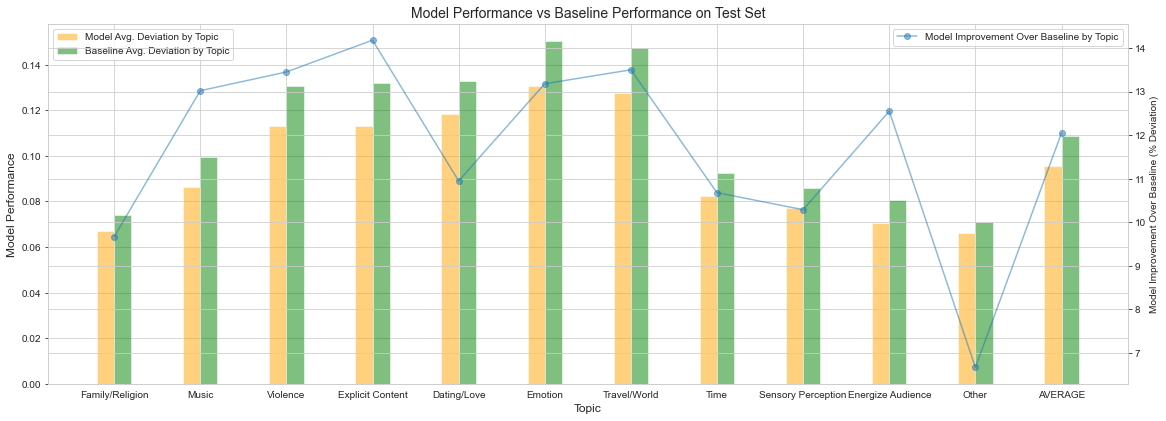

In [22]:
sns.set_style('whitegrid')
fig = plt.figure(figsize = (15,5))
axes = fig.add_axes([0,0,1,1])
axes.bar(np.arange(len(pred_topic_deviation)) - 0.1,pred_topic_deviation,label = 'Model Avg. Deviation by Topic',alpha=0.5,width=0.2,color='orange')
axes.bar(np.arange(len(baseline_topic_deviation))+0.1,baseline_topic_deviation,label = 'Baseline Avg. Deviation by Topic',alpha=0.5,width=0.2,color='green')
axes2 = axes.twinx()
axes2.plot(np.arange(len(improvement_over_baseline)),improvement_over_baseline,
           label='Model Improvement Over Baseline by Topic',alpha = 0.5,marker = 'o')
plt.xticks(np.arange(len(pred_topic_deviation)),[x[7:] for x in pred_topic_deviation.index if x[0] == 'T'] + ['AVERAGE'])
axes.set_xlabel('Topic',fontsize=12)
axes.set_ylabel('Model Performance',fontsize=12)
axes2.set_ylabel('Model Improvement Over Baseline (% Deviation)')
axes.set_title('Model Performance vs Baseline Performance on Test Set',fontsize=14)
axes.legend(loc=2)
axes2.legend(loc=1)
plt.show()

#### Visualize Impact of Variable Embedding Sizes on OOS Model Performance for Different Model Architectures

,Embedding Size,DAN,WAN,CNN,Hybrid
0,100,0.050,0.049,0.053,0.051
1,300,0.045,0.042,0.049,0.060
2,500,0.048,0.046,0.052,0.077
3,1000,0.055,0.053,0.060,0.082


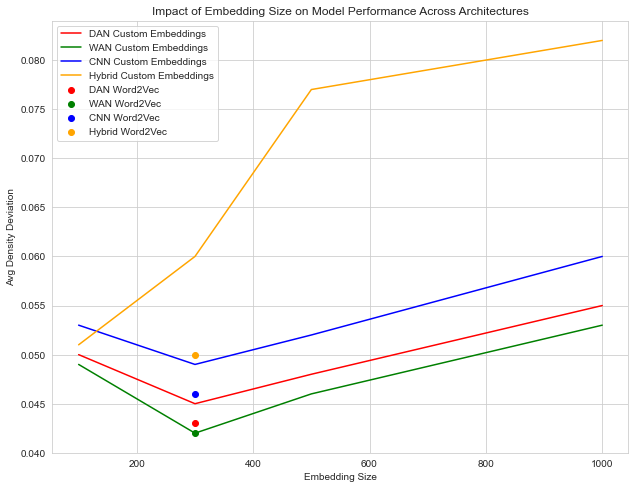

In [23]:
sample_performance = pd.DataFrame()
sample_performance['Embedding Size'] = [100,300,500,1000]
sample_performance['DAN'] = [0.05,0.045,0.048,0.055]
sample_performance['WAN'] = [0.049,0.042,0.046,0.053]
sample_performance['CNN'] = [0.053,0.049,0.052,0.06]
sample_performance['Hybrid'] = [0.051,0.06,0.077,0.082]

display(sample_performance)

fig = plt.figure(figsize = (8,6))
axes = fig.add_axes([0,0,1,1])
colors = ['red','green','blue','orange','teal']
count = 0
for arch in ['DAN','WAN','CNN','Hybrid']: #Plot Model Performance by Embedding Size for Each Architecture
    axes.plot(sample_performance['Embedding Size'],sample_performance[arch],label = arch + ' Custom Embeddings',
             color = colors[count])
    count = count + 1

axes.scatter(300,0.043,color = colors[0],label = 'DAN Word2Vec')
axes.scatter(300,0.042,color = colors[1],label = 'WAN Word2Vec')
axes.scatter(300,0.046,color = colors[2],label = 'CNN Word2Vec')
axes.scatter(300,0.05,color = colors[3],label = 'Hybrid Word2Vec')
axes.set_xlabel('Embedding Size')
axes.set_ylabel('Avg Density Deviation')
axes.set_title('Impact of Embedding Size on Model Performance Across Architectures')
axes.legend()


# 5. Visualize Word Clouds

In [60]:
sample_dataset = pkl.load(open('Genre_Classification/Train_Test_Data/genre_train_final.pkl', 'rb'))

def clean_text(text):
    text = text.lower()
    text = text.replace('\n',' ')
    text = text.replace('  ', ' ')
    return text
sample_dataset['Lyrics'] = sample_dataset['Lyrics'].apply(lambda x:clean_text(x))


#sample_dataset_eng = sample_dataset[sample_dataset['language label'] == 'English'].copy()
#sample_dataset_spa = sample_dataset[sample_dataset['language label'] == 'Spanish'].copy()
#sample_dataset_fre = sample_dataset[sample_dataset['language label'] == 'French'].copy()

In [61]:
wc_eng = wordcloud.WordCloud(
    collocations = False, background_color='white', max_words=500, 
    width = 500, height = 500,).generate(' '.join(list(sample_dataset['Lyrics'])))

#wc_spa = wordcloud.WordCloud(
#    collocations = False, background_color='white', max_words=500, 
#    width = 500, height = 500,).generate(' '.join(list(sample_dataset_spa['Lyric'])))

#wc_fre = wordcloud.WordCloud(
#    collocations = False, background_color='white', max_words=500, 
#    width = 500, height = 500,).generate(' '.join(list(sample_dataset_fre['Lyric'])))

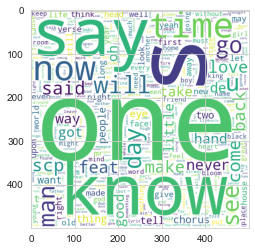

In [62]:
display(plt.imshow(wc_eng))

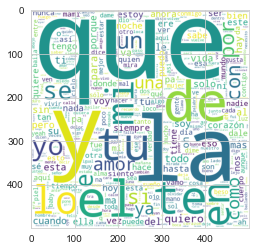

In [27]:
display(plt.imshow(wc_spa))

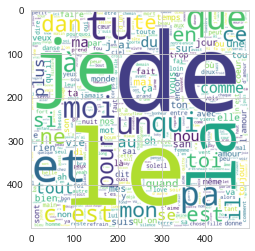

In [28]:
display(plt.imshow(wc_fre))

# 6. Analyze Word Embeddings

In [242]:
word_embeddings = pickle.load(open('Topic_Density_Classification/WANs/word2vec_embeddings.pkl','rb')).astype('float32')

In [243]:
for num in range(len(word_embeddings)):
    word_embeddings.iloc[num] = (1/np.linalg.norm(word_embeddings.iloc[num]))*word_embeddings.iloc[num]

In [244]:
def cosine_sim(word1_embed,word2_embed,normalized=False):
    word1_vec = np.array(word1_embed)
    word2_vec = np.array(word2_embed)
    dot = np.dot(word1_vec,word2_vec)
    if normalized == False:
        mag_word1 = np.linalg.norm(word1_vec)
        mag_word2 = np.linalg.norm(word2_vec)
    else:
        mag_word1 = 1
        mag_word2 = 1
    
    return dot/(mag_word1*mag_word2)

In [245]:
def cosine_sim_mat(df1,df2,normalized = False): #find cosine similarity between every point in mat1 with every point in mat 2
    # consider two points x and z: cosine sim = x*z/||x||*||z||
    
    #Store as matrics
    mat1 = np.matrix(df1).reshape(df1.shape)
    mat2 = np.matrix(df2).reshape(df2.shape)
    
    #Get matrix shape
    n,p = mat1.shape
    m,p = mat2.shape
    
    #Want to return matrix in n x m where every entry i, j = distance from ith point in matrix 1 and jth point from matrix 2
    
    #Gram Schmidt Matrix: entry i,j = dot product between ith point in matrix 1 with jth point in matrix 2
    G = np.dot(mat1, mat2.T)
    
    if normalized == False:
        # X Magnitude Matrix: nxm matrix where ith row = magnitude of ith vector in matrix 1
        x_mag = np.sqrt(np.array([np.dot(mat1[num],mat1[num].T) for num in range(len(mat1))]).flatten()).repeat(m).reshape((n,m))

        # Z Magnitude Matrix: nxm matrix where ith column = magnitude of ith vector in matrix 2
        z_mag = np.sqrt(np.array([np.dot(mat2[num],mat2[num].T) for num in range(len(mat2))]).flatten()).repeat(n).reshape((m,n)).T

        sim_mat = np.divide(G,np.multiply(x_mag,z_mag))
    else:
        sim_mat = G
        
    try:
        sim_mat = pd.DataFrame(sim_mat,index = df1.index,columns = df2.index)
    except:
        sim_mat = pd.DataFrame(sim_mat,index = df1.index)
    
    return sim_mat

In [246]:
def find_most_similar(df1,word_embed,normalized=False,k=1):
    
    sim_mat = cosine_sim_mat(df1,np.array(word_embed).reshape((1,len(word_embed))),normalized=normalized)
    try:
        sim_mat.drop(word_embed.name,inplace=True)
    except:
        sim_mat = sim_mat
        
    sim_mat.sort_values(sim_mat.columns[0],inplace=True,ascending=False)
    best_match = sim_mat.iloc[:k]
    
    return best_match

In [247]:
def do_analogy(df1,word1,word2,word3,normalized = False):
    '''
    word1 is to word2 as word3 is to <word4>
    '''
    similarity = cosine_sim(word1,word2,normalized=normalized)
    sim_mat = cosine_sim_mat(df1,word3,normalized=normalized)
    sim_mat[0] = abs(sim_mat[0] - similarity)
    best_match = sim_mat[sim_mat[0] == sim_mat[0].min()].copy()
    
    return similarity, best_match, df1.loc[best_match.index[0]]

In [281]:
find_most_similar(word_embeddings,word_embeddings.loc['eating'],normalized=True,k=5)

,0
chicken,0.649642
examining,0.618055
tofu,0.582828
blackboard,0.569547
allergy,0.559420


In [289]:
do_analogy(word_embeddings,word_embeddings.loc['socks'], word_embeddings.loc['feet'],word_embeddings.loc['gloves'])

(0.010179165,
                   0
 defenders  0.000005,
 0      0.121669
 1      0.068366
 2      0.037954
 3      0.037286
 4     -0.003816
          ...   
 295    0.013301
 296   -0.015597
 297   -0.056715
 298   -0.045713
 299    0.084470
 Name: defenders, Length: 300, dtype: float32)